In [1]:
import numpy as np
import matplotlib.pyplot as plt

# (c)

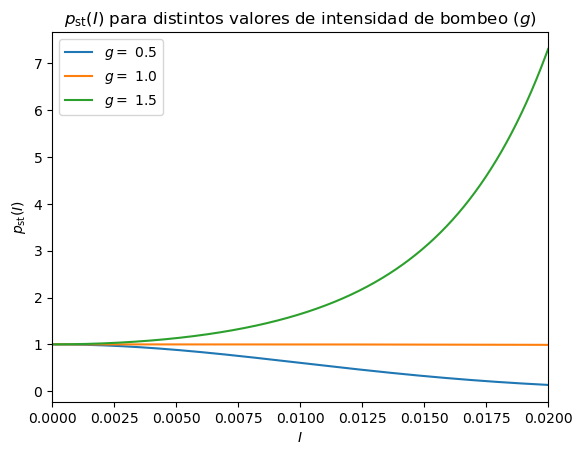

In [36]:
def Pst(I, Pst0, g, beta, alpha, kappa):
    return Pst0 * np.exp((3 * (g - alpha) * I ** 2 - 2 * beta * I ** 3) * (2 / (6 * kappa)))


# parametros
g_list = [0.5, 1.0, 1.5]
beta = 0.2
alpha = 1
kappa = 1e-4
Pst0 = 1

# plotting
I_values = np.linspace(0,0.02,1000)
for g in g_list:
    Pst_values = Pst(I_values, Pst0, g, beta, alpha, kappa)
    plt.plot(I_values, Pst_values, label=rf"$g =$ {g}")

plt.xlabel(r"$I$")
plt.ylabel(r"$p_{\text{st}}(I)$")
plt.xlim(min(I_values), max(I_values))
plt.title(r"$p_{\text{st}}(I)$ para distintos valores de intensidad de bombeo $(g)$")
plt.legend()
plt.savefig("plot_c.png")
plt.show()


# (d)

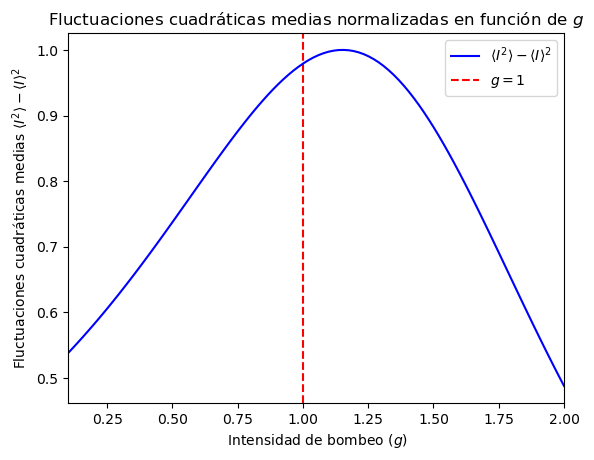

In [ ]:
# Parámetros
beta = 0.2
alpha = 1.0
kappa = 1e-4
Pst0 = 1

g_values = np.linspace(0.1, 2.0, 100)
I_values = np.linspace(0, 0.02, 1000)

fluctuations = []

for g in g_values:

    Pst_values = Pst(I_values, Pst0, g, beta, alpha, kappa)
    Pst_values /= np.trapz(Pst_values, I_values)  # Normalizar p_st(I)

    I_mean = np.trapz(I_values * Pst_values, I_values)  # ⟨I⟩
    I2_mean = np.trapz((I_values**2) * Pst_values, I_values)

    fluctuations.append(I2_mean - I_mean**2) 

fluctuations = fluctuations / max(fluctuations) # normaliza las fluctuaciones

plt.plot(g_values, fluctuations, label=r"$\langle I^2 \rangle - \langle I \rangle^2$", color='b')
plt.axvline(1.0, color='r', linestyle='--', label=r"$g = 1$",zorder=-1)
plt.xlabel(r" Intensidad de bombeo $(g)$")
plt.ylabel(r"Fluctuaciones cuadráticas medias $\langle I^2 \rangle - \langle I \rangle^2$")
plt.title("Fluctuaciones cuadráticas medias normalizadas en función de $g$")
plt.legend(loc="best")
plt.xlim(min(g_values),max(g_values))
plt.savefig("plot_d.png")
plt.show()

# (e)

In [39]:
# Parámetros
beta = 0.2
alpha = 1.0
kappa = 1e-4
Pst0 = 1

## (i)

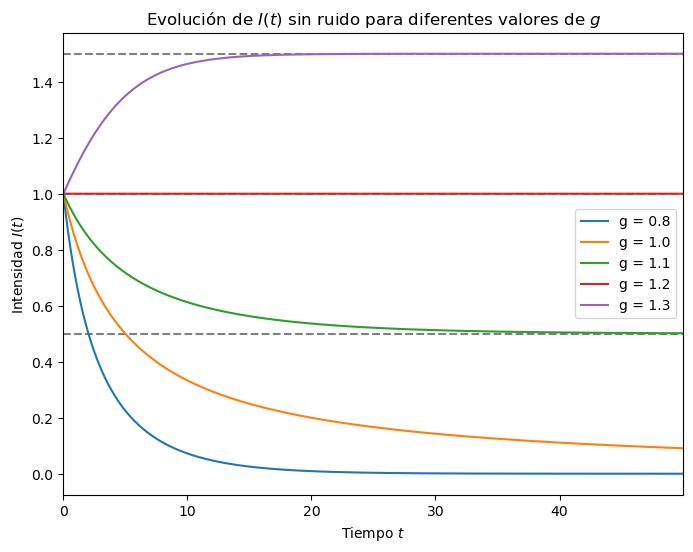

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
beta = 0.2
alpha = 1.0
kappa = 1e-4
dt = 0.01  # Paso de tiempo
t_max = 50  # Tiempo total de simulación
t_values = np.arange(0, t_max, dt)  # Tiempos
I0 = 1.0  # Condición inicial

# Función para integrar sin ruido (ξ = 0)
def integrate_no_noise(I0, g, beta, alpha, dt, t_values):
    I = np.zeros_like(t_values)
    I[0] = I0
    for i in range(1, len(t_values)):
        I[i] = I[i - 1] + dt * ((g - alpha) * I[i - 1] - beta * I[i - 1]**2)
    return I

# Valores de g para analizar
g_values = [ 0.8, 1.0, 1.1, 1.2, 1.3]

# Graficar resultados
plt.figure(figsize=(8, 6))
for g in g_values:
    I = integrate_no_noise(I0, g, beta, alpha, dt, t_values)
    plt.plot(t_values, I, label=f'g = {g}')
    if g > 1.0:
        plt.axhline((g - alpha) / beta, color='gray', linestyle='--', zorder=-1)

# Personalizar gráfica
plt.xlabel("Tiempo $t$")
plt.ylabel("Intensidad $I(t)$")
plt.title("Evolución de $I(t)$ sin ruido para diferentes valores de $g$")
plt.xlim(min(t_values), max(t_values))
plt.legend(loc="center right")
plt.savefig("plot_e_i.png")
plt.show()

## (ii)

Media de ξ(t): -2.13598e-04
Varianza de ξ(t): 1.00684e-02
Intensidad efectiva del ruido (kappa): 1.00684e-04


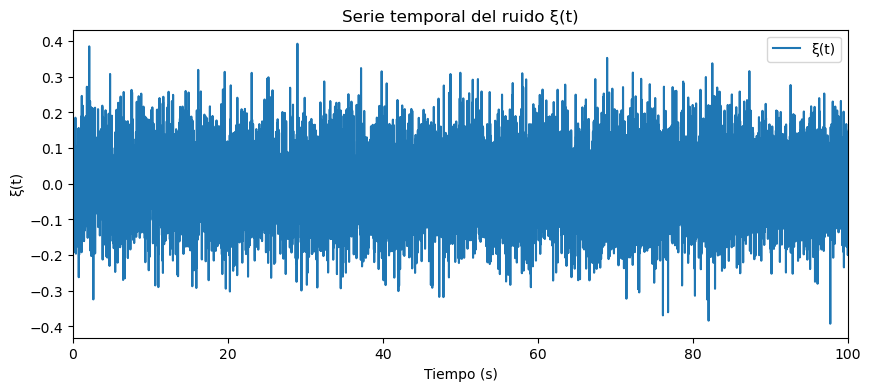

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
kappa = 1e-4  # Intensidad del ruido
dt = 0.01     # Paso de tiempo
n_steps = 10000  # Número de pasos en la simulación

# Calcular la desviación estándar del ruido, por consturcción para que calce con \sqrt{kappa / Delta t}
sigma = np.sqrt(kappa / dt)

# Generar la serie temporal para ξ(t)
np.random.seed(42)  # Para reproducibilidad
xi = np.random.normal(0, sigma, n_steps)

# Verificación de propiedades
mean_xi = np.mean(xi)
variance_xi = np.var(xi)

print(f"Media de ξ(t): {mean_xi:.5e}")
print(f"Varianza de ξ(t): {variance_xi:.5e}")
print(f"Intensidad efectiva del ruido (kappa): {variance_xi * dt:.5e}")

# Graficar la serie temporal
t_values = np.linspace(0, n_steps * dt, n_steps)
plt.figure(figsize=(10, 4))
plt.plot(t_values, xi, label='ξ(t)')
plt.title("Serie temporal del ruido ξ(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("ξ(t)")
plt.legend()
plt.xlim(min(t_values), max(t_values))
plt.savefig("plot_e_ii.png")
plt.show()

## (iii)

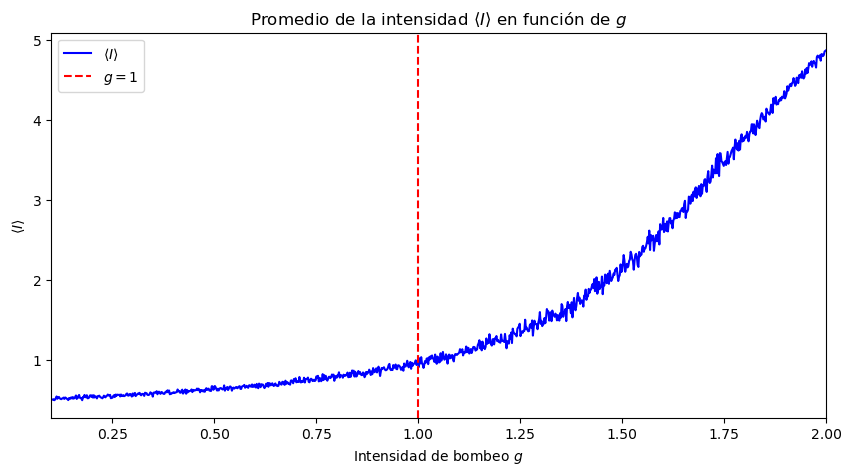

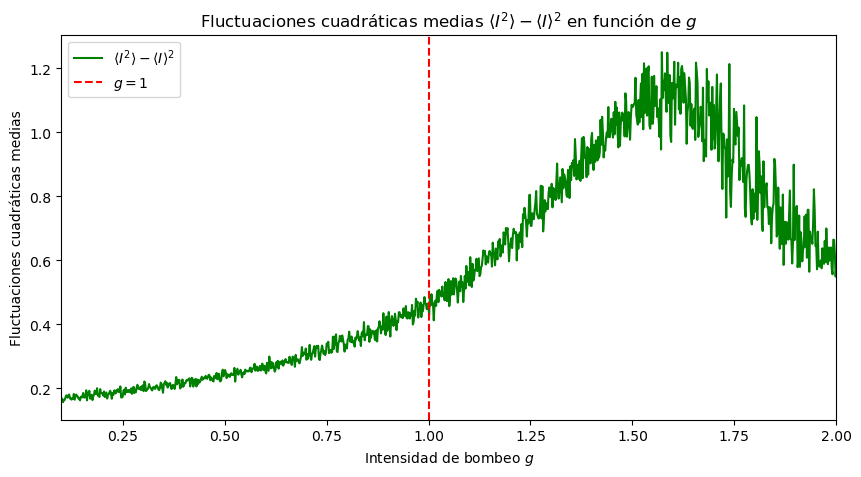

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
beta = 0.2
alpha = 1.0
kappa = 1e-4
dt = 0.01  # Paso de tiempo
n_steps = 100000  # Número de pasos en la simulación
I0 = 1.0  # Condición inicial para la intensidad

g_values = np.linspace(0.1, 2.0, 1000)

I_means = []  # ⟨I⟩
I_variances = []  # ⟨I^2⟩ - ⟨I⟩^2

for g in g_values:
    I = np.zeros(n_steps)
    I[0] = I0

    sigma = np.sqrt(kappa / dt)
    noise = np.random.normal(0, sigma, n_steps)

    for t in range(1, n_steps):
        dI = ((g - alpha) * I[t - 1] - beta * I[t - 1]**2) * dt + noise[t]
        I[t] = I[t - 1] + dI
        if I[t] < 0:  # Corregir valores negativos de I
            I[t] = 0

    I_mean = np.mean(I)
    I_var = np.var(I)
    I_means.append(I_mean)
    I_variances.append(I_var)

# Graficar ⟨I⟩ en función de g
plt.figure(figsize=(10, 5))
plt.plot(g_values, I_means, label=r"$\langle I \rangle$", color='blue')
plt.axvline(1.0, color='red', linestyle='--', label=r"$g = 1$")
plt.xlabel(r"Intensidad de bombeo $g$")
plt.ylabel(r"$\langle I \rangle$")
plt.title(r"Promedio de la intensidad $\langle I \rangle$ en función de $g$")
plt.legend(loc="best")
plt.xlim(min(g_values), max(g_values))
plt.savefig("plot_e_iii_mean.png")
plt.show()

# Graficar ⟨I^2⟩ - ⟨I⟩^2 en función de g
plt.figure(figsize=(10, 5))
plt.plot(g_values, I_variances, label=r"$\langle I^2 \rangle - \langle I \rangle^2$", color='green')
plt.axvline(1.0, color='red', linestyle='--', label=r"$g = 1$")
plt.xlabel(r"Intensidad de bombeo $g$")
plt.ylabel(r"Fluctuaciones cuadráticas medias")
plt.title(r"Fluctuaciones cuadráticas medias $\langle I^2 \rangle - \langle I \rangle^2$ en función de $g$")
plt.legend(loc="best")
plt.xlim(min(g_values), max(g_values))
plt.savefig("plot_e_iii_variance.png")
plt.show()


In [ ]:
n_steps